# Test

### import

In [1]:
import os

from sklearn import preprocessing
from nilearn import image, datasets, input_data, plotting

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

### load data

In [2]:
trainingList = ['../train/%s'%x for x in os.listdir('../train/')]; trainingList.sort()

In [3]:
testList = ['../test/%s'%x for x in os.listdir('../test/')]; testList.sort()

In [4]:
testList[-5:]

['../test/spatial_054_market.nii.gz',
 '../test/spatial_059_school.nii.gz',
 '../test/spatial_063_citysquare.nii.gz',
 '../test/spatial_068_market.nii.gz',
 '../test/spatial_071_church.nii.gz']

### define a whole-brain masker

In [5]:
masker = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
                                smoothing_fwhm=8).fit()

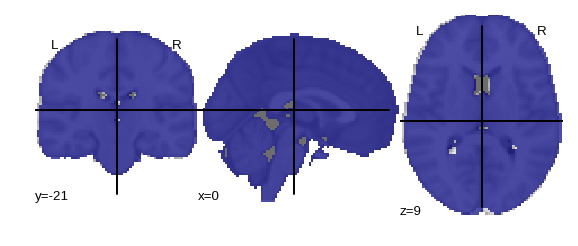

In [6]:
plotting.plot_roi(masker.mask_img_);

### extract all training data, for mask creation

In [7]:
def makeBigDf(imgList,masker):
    
    # empty dataframe to write to
    bigDf = pd.DataFrame()
    
    for img in imgList:
        # extract naming of block from file
        thisName = img.split('/')[-1].split('.')[0]
        cond,num,content = thisName.split('_')
        cont = '%s-%s' % (num,content)
        # extract data using masker
        thisDf = pd.DataFrame(masker.transform(img))
        # name index
        thisDf.index = [[cond],[cont]]
        #add to big df
        bigDf = pd.concat([bigDf,thisDf])
    
    bigDf.sort_index(inplace=True)
    
    return bigDf

In [8]:
trainingDf = makeBigDf(trainingList,masker)

In [9]:
trainingDf.tail()

0         1         2         3         4       \
spatial 026-church      0.223630  0.188620  0.125171  0.268114  0.221804   
        032-basement   -0.041100 -0.046069 -0.050791 -0.060103 -0.073092   
        038-promenade  -0.163325 -0.177723 -0.180129 -0.162763 -0.162859   
        041-cityofkiel -0.117256 -0.090441 -0.047598 -0.122760 -0.089177   
        049-university  0.187252  0.150620  0.097614  0.218440  0.170987   

                          5         6         7         8         9       \
spatial 026-church      0.263701  0.265698  0.219562  0.223942 -0.039844   
        032-basement   -0.043296 -0.060824 -0.077660 -0.048601 -0.058503   
        038-promenade  -0.147720 -0.153447 -0.140881 -0.141180 -0.224724   
        041-cityofkiel -0.129301 -0.127705 -0.094319 -0.125368 -0.118116   
        049-university  0.227095  0.225245  0.177851  0.203507  0.002186   

                          ...       228473    228474    228475    228476  \
spatial 026-church        ...    -0.002711 -0.002084 -0.053970 -0.086229   
        032-basement      ...    -0.002392 -0.023793 -0.013884 -0.031315   
        038-promenade     ...    -0.073790 -0.074498 -0.037559 -0.013020   
        041-cityofkiel    ...     0.115492  0.121814 -0.035957 -0.037125   
        049-university    ...     0.070704  0.076335  0.052592  0.021462   

                          228477    228478    228479    228480    228481  \
spatial 026-church     -0.110444 -0.123875 -0.057813 -0.091179 -0.112798   
        032-basement   -0.037520 -0.036132 -0.011853 -0.023430 -0.024336   
        038-promenade  -0.024725 -0.057618 -0.039786  0.001544  0.008356   
        041-cityofkiel -0.021910  0.004511 -0.024679 -0.024845 -0.007070   
        049-university  0.010567  0.014491  0.048918  0.024989  0.016553   

                          228482  
spatial 026-church     -0.094293  
        032-basement   -0.007793  
        038-promenade   0.004252  
        041-cityofkiel  0.003391  
        049-university  0.015058  

[5 rows x 228483 columns]

In [10]:
meanTrainingDf = trainingDf.groupby(level=0).mean()

In [11]:
meanTrainingDf

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
faces,-0.009190,0.000667,0.006361,-0.008022,0.001246,-0.015660,-0.006670,-0.000523,-0.005715,-0.004810,...,-0.010532,-0.015145,0.003356,-0.007788,-0.015298,-0.018877,0.013539,0.001342,-0.006435,0.004723
language,-0.043500,-0.043944,-0.042280,-0.052437,-0.055666,-0.044689,-0.050390,-0.053713,-0.040270,-0.012379,...,-0.029957,-0.030430,-0.025893,-0.005730,0.003045,0.003760,-0.035415,-0.014916,-0.005968,-0.014486
motor,0.000291,-0.004207,-0.005079,0.004889,0.000669,0.013782,0.008536,0.003935,0.011485,0.019878,...,0.014953,0.026591,-0.020739,-0.025195,-0.024513,-0.021705,-0.008296,-0.011598,-0.009594,0.003931
rest,0.019607,0.025876,0.029206,0.016848,0.025352,-0.002390,0.006009,0.015615,-0.009085,0.022037,...,-0.004928,-0.019125,0.020533,0.025296,0.027571,0.028363,0.004747,0.005455,0.004201,-0.017883
spatial,0.030110,0.019613,0.009869,0.034751,0.024840,0.043088,0.037274,0.029685,0.037395,-0.024724,...,0.021249,0.026244,0.020824,0.011342,0.007505,0.007904,0.023498,0.018028,0.017178,0.022385


### make Mask

In [12]:
def makeMasks(meanDf,pc):
    roiDict = {}
    
    # because we will edit the dataframe, we first make a deep copy
    copyDf = meanDf.copy()

    for cond in copyDf.index:

        thisCond = copyDf.ix[cond]
        
        # identify only cells that are above a certian percentile for that condition
        thisPercentile = np.percentile(thisCond,pc)
        
        # binarize the map at that percentile
        thisCond[thisCond>=thisPercentile]=999999
        thisCond[thisCond<999999] = 0
        thisCond[thisCond>0] = 1

        roiDict[cond] = thisCond
    
    roiDf = pd.DataFrame(roiDict).T
    
    return roiDf

In [13]:
def mergeRois(roiDf):
    
    copyDf = roiDf.copy()
    # add up the five masks
    sumDf = pd.DataFrame( copyDf.sum(axis=0) )
    # binarize the summary mask
    sumDf[sumDf>0] = 1
    sumDf[sumDf<1] = 0
    
    return sumDf.T

In [14]:
def makeMasker(voxelPc,smoo,imgList=trainingList,masker=masker):
    # get the data
    blockDf = makeBigDf(imgList,masker)
    # get all training data for mask creation
    meanDf = blockDf.groupby(level=0).mean()
    # make the 5 masks
    roiDf = makeMasks(meanDf,voxelPc)
    # merge the 5 masks
    thisBigRoi = mergeRois(roiDf)
    # make mask image
    thisBigRoiImg = masker.inverse_transform(thisBigRoi.values)
    # make masker object from mask + the setting of a smoothing kernel
    roiMasker = input_data.NiftiMasker(mask_img=thisBigRoiImg,smoothing_fwhm=smoo).fit()
    
    return roiMasker

###  define the masker

Based on the feature selection from training, we use a masker that contains the top 1% voxel of each condition (which would be 5% of the brain if there is no overlap between conditions, which it approx. is) and no smoothing.

In [15]:
roiMasker = makeMasker(99,0)

In [16]:
roiMasker

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img=<nibabel.nifti1.Nifti1Image object at 0x7fc23b224210>,
      mask_strategy='background', memory=Memory(cachedir=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=0,
      standardize=False, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

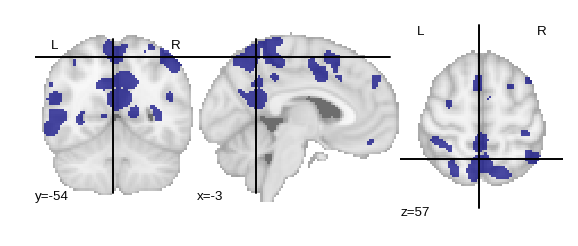

In [17]:
plotting.plot_roi(roiMasker.mask_img_)

### apply masker to training data + get averages

In [18]:
trainingDf = makeBigDf(trainingList,roiMasker)
meanTrainingDf = trainingDf.groupby(level=0).mean()

In [19]:
meanTrainingDf

,0,1,2,3,4,5,6,7,8,9,...,11015,11016,11017,11018,11019,11020,11021,11022,11023,11024
faces,-0.188405,-0.195755,-0.207987,0.700037,-0.208599,-0.220722,-0.250206,-0.187005,-0.187359,-0.196359,...,0.192631,0.179101,0.154325,0.128452,0.133966,0.344792,0.537049,0.507729,0.482527,0.144543
language,0.506788,0.515152,0.479892,0.244381,0.541393,0.519334,0.541931,0.556080,0.556703,0.576153,...,0.693892,0.888516,0.816893,0.810485,0.600241,0.379016,0.584442,0.559284,0.643294,0.056042
motor,-0.032581,-0.041072,-0.084336,-0.226082,-0.052981,-0.030411,-0.028274,-0.064838,-0.062806,-0.072826,...,-0.436837,-0.162871,-0.097210,-0.094950,-0.001045,-0.487006,-0.213283,-0.132702,-0.136603,-0.134005
rest,-0.134376,-0.130610,-0.138427,-0.332208,-0.127279,-0.126482,-0.123410,-0.122740,-0.126339,-0.115060,...,-0.448992,-0.590633,-0.537892,-0.513936,-0.430073,-0.127932,-0.621259,-0.649239,-0.669632,0.139029
spatial,-0.149797,-0.144810,-0.057964,-0.302795,-0.153271,-0.151480,-0.153091,-0.174614,-0.173234,-0.183217,...,-0.007643,-0.305411,-0.326315,-0.318939,-0.288448,-0.108021,-0.301413,-0.297441,-0.328737,-0.149773


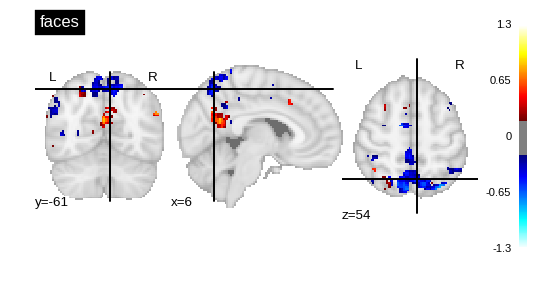

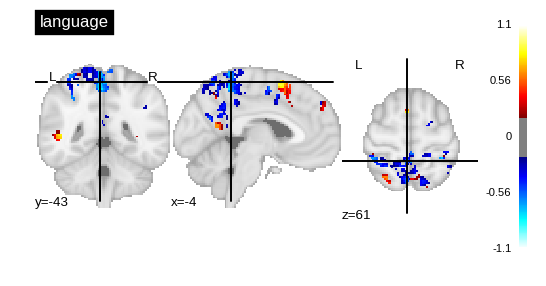

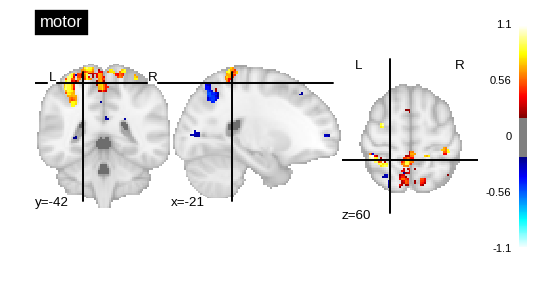

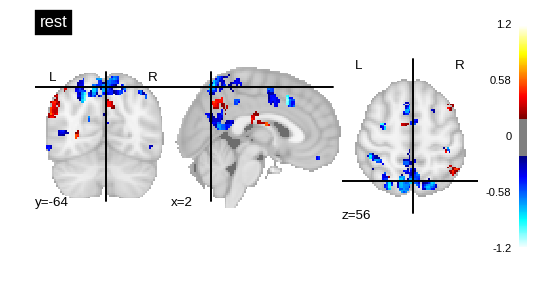

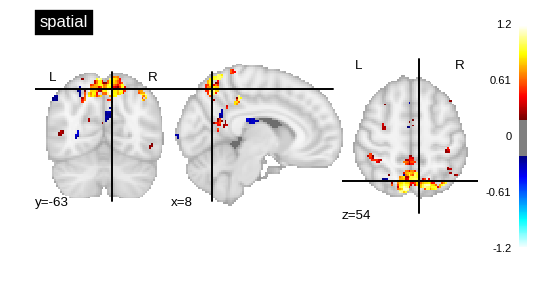

In [20]:
for cond in meanTrainingDf.index:
    fig,ax1 = plt.subplots(1,1,figsize=(8,4))
    thisIm = roiMasker.inverse_transform(meanTrainingDf.ix[cond])
    plotting.plot_stat_map(thisIm,title=cond,threshold=.2,axes=ax1)
    plt.show()

### apply masker to test data

In [21]:
testDf = makeBigDf(testList,roiMasker)

In [22]:
testDf.shape

(25, 11025)

In [23]:
testDf

0         1         2         3         4      \
faces    051-movieactors -0.735554 -0.707860 -0.514222  1.298323 -0.709339   
         058-athletes     0.075175  0.048161  0.231946  0.508769  0.113602   
         064-family      -0.329418 -0.313266 -0.335616  0.864882 -0.386445   
         067-friends     -0.621211 -0.645567 -0.616614  0.215454 -0.662048   
         074-politicians -0.436710 -0.409475 -0.451322  0.781938 -0.411691   
language 052-countries    0.216116  0.274523  0.483228 -0.169693  0.301646   
         056-animals      0.921197  0.902560  0.133035 -0.680453  0.902838   
         062-animals      0.322520  0.404614  0.523403  0.564703  0.385016   
         066-tools        0.565128  0.609258  0.559164 -0.014742  0.488389   
         073-fruit        0.659919  0.732789  0.527016  0.254902  0.711955   
motor    055-badminton    0.343441  0.299226 -0.109198 -0.643727  0.295705   
         060-swimming     0.133766  0.114637 -0.166031 -0.221302  0.123144   
         065-badminton    0.341140  0.258455  0.471004 -0.723911  0.271775   
         070-tennis      -0.192888 -0.196865 -0.256040  0.061011 -0.125242   
         075-climbing    -0.167303 -0.159743 -0.137482 -0.947683 -0.178299   
rest     053-rest        -0.343978 -0.377100 -0.290070  0.433828 -0.351160   
         057-rest        -0.282685 -0.226300 -0.357233 -0.750901 -0.323303   
         061-rest        -0.704976 -0.669964 -0.308623  0.532446 -0.669451   
         069-rest        -0.582216 -0.512708 -0.045695  1.191647 -0.547269   
         072-rest         0.075561  0.057652  0.238818  0.231074  0.025583   
spatial  054-market      -0.168037 -0.135291  0.032977 -0.377219 -0.163757   
         059-school       0.156333  0.066734 -0.055847 -0.931856  0.136280   
         063-citysquare  -0.304952 -0.333064  0.264252 -0.082398 -0.319513   
         068-market       0.193820  0.117661  0.215136 -0.608907  0.179747   
         071-church       0.466098  0.427304 -0.096933 -0.533634  0.516998   

                             5         6         7         8         9      \
faces    051-movieactors -0.705357 -0.710256 -0.696018 -0.682859 -0.590596   
         058-athletes     0.061396  0.116858  0.186045  0.193396  0.183694   
         064-family      -0.263418 -0.179242 -0.405841 -0.402410 -0.405722   
         067-friends     -0.732442 -0.692232 -0.584938 -0.583723 -0.623532   
         074-politicians -0.406602 -0.506006 -0.406735 -0.403319 -0.374251   
language 052-countries    0.348948  0.356738  0.235910  0.221226  0.289923   
         056-animals      0.681489  0.578851  0.984139  0.985640  0.986640   
         062-animals      0.498293  0.429852  0.341385  0.346423  0.448246   
         066-tools        0.335841  0.290887  0.571360  0.577558  0.615920   
         073-fruit        0.733602  0.776155  0.717350  0.724272  0.846103   
motor    055-badminton    0.297633  0.193343  0.314576  0.318820  0.216459   
         060-swimming     0.075585  0.102279  0.113926  0.112392  0.089787   
         065-badminton    0.349661  0.378032  0.243158  0.243032  0.133734   
         070-tennis      -0.023195  0.002261 -0.171693 -0.175705 -0.212227   
         075-climbing    -0.176997 -0.282787 -0.220660 -0.222863 -0.194152   
rest     053-rest        -0.344130 -0.346081 -0.389630 -0.394992 -0.423041   
         057-rest        -0.301565 -0.249062 -0.293589 -0.294768 -0.266045   
         061-rest        -0.669042 -0.613706 -0.657216 -0.659443 -0.653262   
         069-rest        -0.392307 -0.371694 -0.615412 -0.612780 -0.535591   
         072-rest        -0.002612  0.111175  0.060361  0.048971  0.041365   
spatial  054-market      -0.109981 -0.087486 -0.196343 -0.187055 -0.122875   
         059-school       0.052333 -0.032798  0.162228  0.149705  0.030791   
         063-citysquare  -0.283407 -0.225781 -0.352008 -0.364729 -0.374660   
         068-market       0.156232  0.152686  0.155955  0.154919  0.063743   
         071-church       0.392608  0.365861  0.53

### get the correlations only of test blocks and train blocks

In [24]:
blockCorrDf = pd.DataFrame(np.corrcoef(trainingDf,testDf)[50:,:50],
                           index=testDf.index,
                           columns=trainingDf.index)

In [25]:
myOrder = ['language','motor','spatial','faces','rest']
blockCorrDf = blockCorrDf.reindex(myOrder,level=0)
blockCorrDf = blockCorrDf[myOrder]

In [26]:
blockCorrDf

language                                     \
                         002-animals 006-tools 012-cities 018-countries   
language 052-countries      0.104791  0.193974   0.038989      0.323028   
         056-animals        0.442158  0.521674   0.500867      0.374380   
         062-animals        0.605720  0.516941   0.466952      0.551571   
         066-tools          0.431270  0.655425   0.560798      0.298579   
         073-fruit          0.613327  0.642735   0.547610      0.522560   
motor    055-badminton     -0.298389 -0.340566  -0.449558     -0.084585   
         060-swimming      -0.314587 -0.102267  -0.240044     -0.220676   
         065-badminton     -0.236974 -0.400441  -0.515875     -0.065799   
         070-tennis        -0.133095 -0.279995  -0.513313      0.091996   
         075-climbing      -0.187496 -0.319098  -0.426735      0.091752   
spatial  054-market         0.124670 -0.190697  -0.071008      0.154677   
         059-school        -0.053318 -0.287773  -0.155678     -0.059489   
         063-citysquare    -0.301152 -0.434274  -0.239268     -0.392232   
         068-market        -0.238824 -0.425086  -0.302827     -0.229188   
         071-church        -0.034979 -0.137117   0.093744     -0.142140   
faces    051-movieactors    0.125755  0.145681   0.099660      0.100055   
         058-athletes       0.272761  0.308755   0.318071      0.184737   
         064-family        -0.063212  0.007502  -0.022435     -0.080202   
         067-friends        0.095014  0.104631   0.319238     -0.126989   
         074-politicians    0.196666  0.224839   0.244820      0.251218   
rest     053-rest          -0.309214 -0.126291  -0.069237     -0.419179   
         057-rest          -0.178510 -0.043209  -0.215578     -0.079388   
         061-rest          -0.238013  0.006119   0.093587     -0.371613   
         069-rest          -0.223017 -0.085575  -0.024582     -0.368776   
         072-rest          -0.222529  0.040744   0.045356     -0.304853   

                                                                  \
                         021-occupations 028-fruits 034-clothing   
language 052-countries         -0.064692   0.172837     0.259579   
         056-animals            0.614445   0.596588     0.186674   
         062-animals            0.498703   0.650883     0.305590   
         066-tools              0.663557   0.582752     0.510311   
         073-fruit              0.535795   0.735929     0.358354   
motor    055-badminton         -0.319941  -0.305173    -0.060489   
         060-swimming          -0.267265  -0.191829     0.191858   
         065-badminton         -0.496077  -0.271469    -0.139950   
         070-tennis            -0.407772  -0.092629    -0.128999   
         075-climbing          -0.393966  -0.226428    -0.280942   
spatial  054-market            -0.110147  -0.010949    -0.482464   
         059-school            -0.136907  -0.126644    -0.533947   
         063-citysquare        -0.266640  -0.490751    -0.325988   
         068-market            -0.367614  -0.370528    -0.511942   
         071-church            -0.035132  -0.145506    -0.347446   
faces    051-movieactors        0.086229   0.103654     0.073107   
         058-athletes           0.506269   0.422169     0.052516   
         064-family            -0.031946  -0.070669     0.151033   
         067-friends            0.332870   0.038233    -0.005849   
         074-politicians        0.351081   0.208035     0.108410   
rest     053-rest              -0.174201  -0.414387     0.128092   
         057-rest              -0.277547  -0.050902     0.226253   
         061-rest              -0.067943  -0.230873     0.265167   
         069-rest              -0.122075  -0.249167     0.162303   
         072-rest              -0.013893  -0.177624     0.234938   

                                                                    ...     \
                         039-vegetables 044-furniture 048-colors    ...      
language 

### compute the number of blocks from the same domain which are among the top 10 of highest correlating blocks

In [27]:
d = {}
for i in blockCorrDf.index:
    thisEntry = blockCorrDf.loc[i].sort_values(ascending=False)[:10]
    thisNum = pd.DataFrame( thisEntry ).loc[i[0]].shape[0]
    d[i] = thisNum
df = pd.DataFrame(d,index=['num']).T

In [28]:
df

num
faces    051-movieactors    8
         058-athletes       6
         064-family         5
         067-friends        8
         074-politicians    9
language 052-countries      5
         056-animals        8
         062-animals        9
         066-tools          9
         073-fruit          9
motor    055-badminton      9
         060-swimming       3
         065-badminton      9
         070-tennis         9
         075-climbing       5
rest     053-rest           8
         057-rest           8
         061-rest           8
         069-rest           9
         072-rest           9
spatial  054-market         9
         059-school         9
         063-citysquare     8
         068-market         8
         071-church         9

### show block-wise correlation

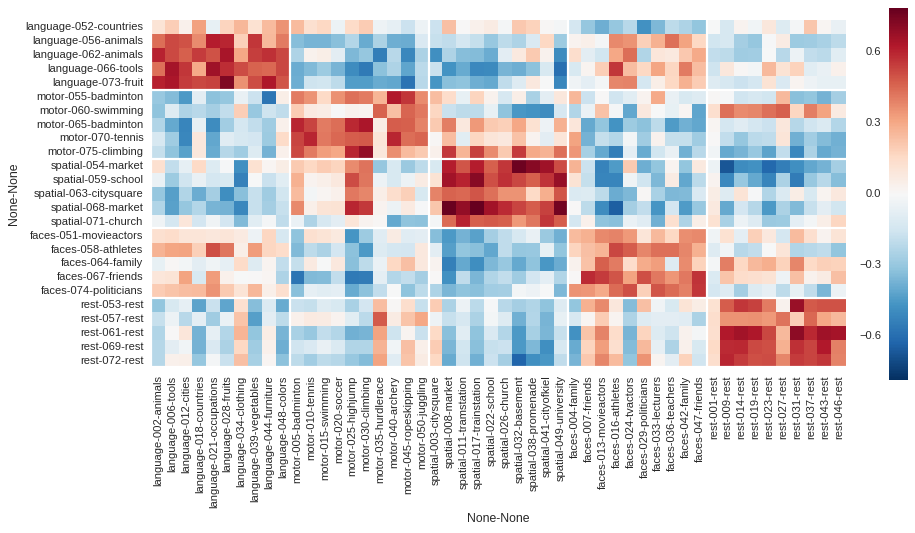

In [29]:
fig,ax1 = plt.subplots(figsize=(14,6))

sns.heatmap(blockCorrDf,annot=False,square=True,ax=ax1)

for i in range(0,25,5):
    ax1.axhline(i,color='white',linewidth=2)
for i in range(0,50,10):
    ax1.axvline(i,color='white',linewidth=2)

sns.despine(left=True,bottom=True)
plt.show()

Get highest correlation, to control colorbar range

In [30]:
myMax=abs(blockCorrDf).max().max()

In [31]:
myMax

0.7860775967105489

round up, to have nicer scale

In [32]:
thisMax = (myMax+0.05).round(1)

In [33]:
thisMax

0.8

### figure with emphasis of top 10 correlations

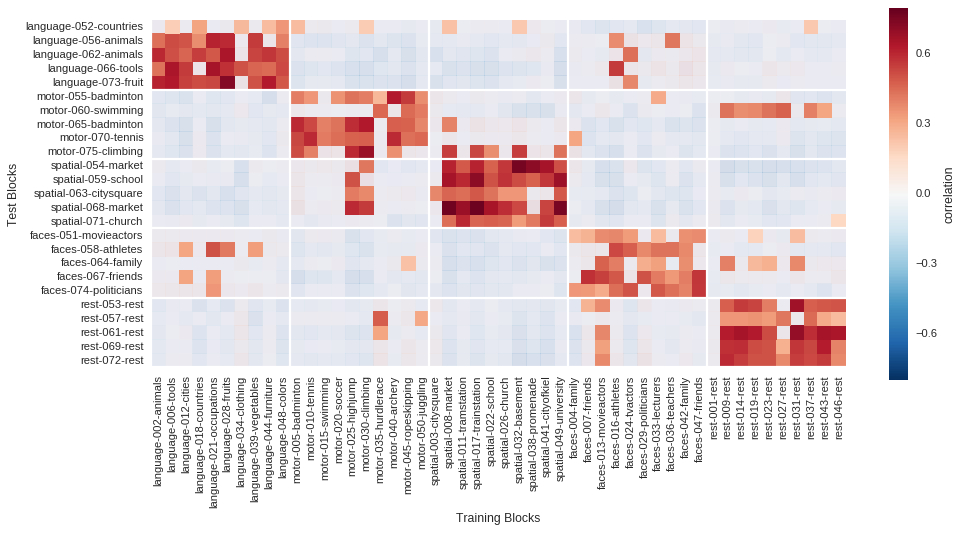

In [34]:
bigDf = pd.DataFrame()
for i in blockCorrDf.index:
    nr10 = blockCorrDf.loc[i].sort_values(ascending=False)[9]
    thisDf = pd.DataFrame( blockCorrDf.loc[i]>=nr10 ).T
    bigDf = pd.concat([bigDf,thisDf])
    
plt.figure(figsize=(14,6))

sns.heatmap(blockCorrDf[bigDf==False],annot=False,square=True,vmin=-0.6,vmax=thisMax,alpha=0.1,cbar=False)
sns.heatmap(blockCorrDf[bigDf==True],annot=False,square=True,vmin=-0.6,vmax=thisMax,alpha=1,
            cbar_kws={"label": "correlation"} )
plt.xlabel('Training Blocks')
plt.ylabel('Test Blocks')
for i in range(0,25,5):
    plt.axhline(i,color='white',linewidth=2)
for i in range(0,50,10):
    plt.axvline(i,color='white',linewidth=2)
#plt.savefig('../figs/blockWiseHeat.png',dpi=300,bbox_inches='tight')
plt.show()

### figure with emphasis of the highest correating block

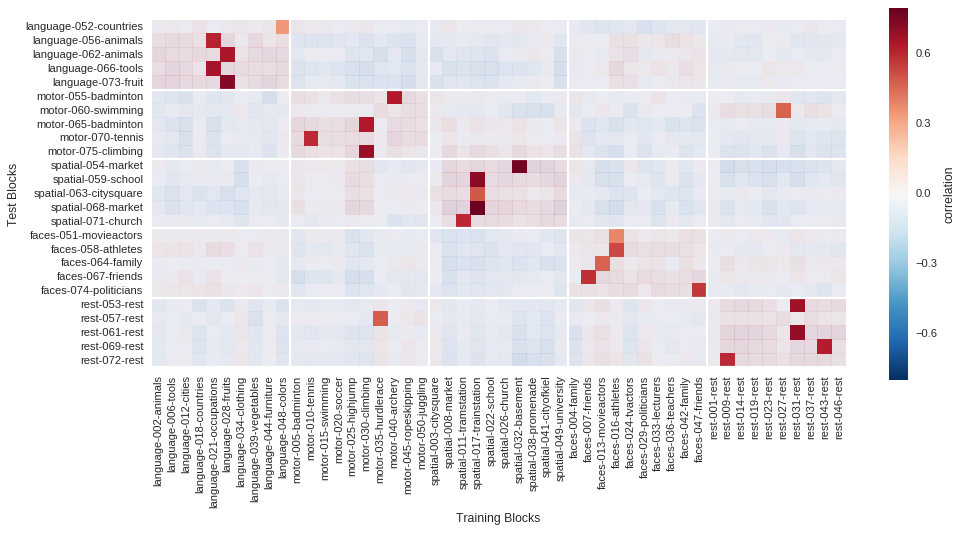

In [35]:
bigDf = pd.DataFrame()
for i in blockCorrDf.index:
    nr1 = blockCorrDf.loc[i].sort_values(ascending=False)[0]
    thisDf = pd.DataFrame( blockCorrDf.loc[i]==nr1 ).T
    bigDf = pd.concat([bigDf,thisDf])
    

plt.figure(figsize=(14,6))

sns.heatmap(blockCorrDf[bigDf==False],annot=False,square=True,vmin=-0.6,vmax=thisMax,alpha=0.1,cbar=False)
sns.heatmap(blockCorrDf[bigDf==True],annot=False,square=True,vmin=-0.6,vmax=thisMax,alpha=1,
            cbar_kws={"label": "correlation"} )
plt.xlabel('Training Blocks')
plt.ylabel('Test Blocks')
for i in range(0,25,5):
    plt.axhline(i,color='white',linewidth=2)
for i in range(0,50,10):
    plt.axvline(i,color='white',linewidth=2)
#plt.savefig('../figs/blockWiseHeat.png',dpi=300,bbox_inches='tight')
plt.show()

### compute how many content predictions are correct

In [36]:
# get the highest correlation
blockMaxDf = pd.DataFrame(blockCorrDf.T.idxmax()).drop('rest')
# for all the highest correlations
for i in blockMaxDf.index:
    thisDf = blockMaxDf.loc[i]
    # extract the content from the name
    thisContent = thisDf.name[-1].split('-')[-1]
    thisPred = thisDf[0][-1].split('-')[-1]
    # check if contents match
    thisEval = thisContent == thisPred
    # add evaluation to dataframe
    blockMaxDf.set_value(i,'eval',thisEval)
    
blockMaxDf

0   eval
language 052-countries         (language, 048-colors)  False
         056-animals      (language, 021-occupations)  False
         062-animals           (language, 028-fruits)  False
         066-tools        (language, 021-occupations)  False
         073-fruit             (language, 028-fruits)  False
motor    055-badminton           (motor, 040-archery)  False
         060-swimming                (rest, 027-rest)  False
         065-badminton          (motor, 030-climbing)  False
         070-tennis               (motor, 010-tennis)   True
         075-climbing           (motor, 030-climbing)   True
spatial  054-market           (spatial, 032-basement)  False
         059-school       (spatial, 017-trainstation)  False
         063-citysquare   (spatial, 017-trainstation)  False
         068-market       (spatial, 017-trainstation)  False
         071-church        (spatial, 011-tramstation)  False
faces    051-movieactors        (faces, 016-athletes)  False
         058-athletes           (faces, 016-athletes)   True
         064-family          (faces, 013-movieactors)  False
         067-friends             (faces, 007-friends)   True
         074-politicians         (faces, 047-friends)  False

In [37]:
print "there are %0.f%% correct content predictions" % (blockMaxDf['eval'].mean()*100)

there are 20% correct content predictions


### Final Heatmap for blockwise correlations

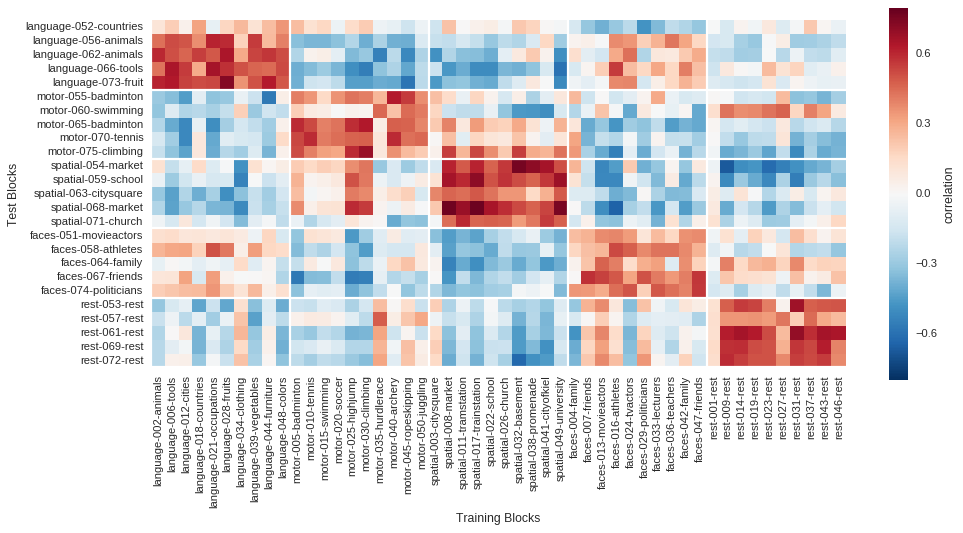

In [38]:
bigDf = pd.DataFrame()
for i in blockCorrDf.index:
    nr1 = blockCorrDf.loc[i].sort_values(ascending=False)[0]
    thisDf = pd.DataFrame( blockCorrDf.loc[i]==nr1 ).T
    bigDf = pd.concat([bigDf,thisDf])
    

plt.figure(figsize=(14,6))

sns.heatmap(blockCorrDf,annot=False,square=True,vmin=-0.6,vmax=thisMax,
            cbar_kws={"label": "correlation"} )

plt.xlabel('Training Blocks')
plt.ylabel('Test Blocks')
for i in range(0,25,5):
    plt.axhline(i,color='white',linewidth=2)
for i in range(0,50,10):
    plt.axvline(i,color='white',linewidth=2)
plt.savefig('../figs/fig8_blockWiseHeat.png',dpi=300,bbox_inches='tight')
plt.show()

### Test block with average training domain correlations

In [39]:
myCorrDf = pd.DataFrame(np.corrcoef(meanTrainingDf,testDf)[5:,:5],
                       index=testDf.index,
                       columns=meanTrainingDf.index)

In [40]:
myOrder = ['language','motor','spatial','faces','rest']
myCorrDf = myCorrDf.reindex(myOrder,level=0)
myCorrDf = myCorrDf[myOrder]

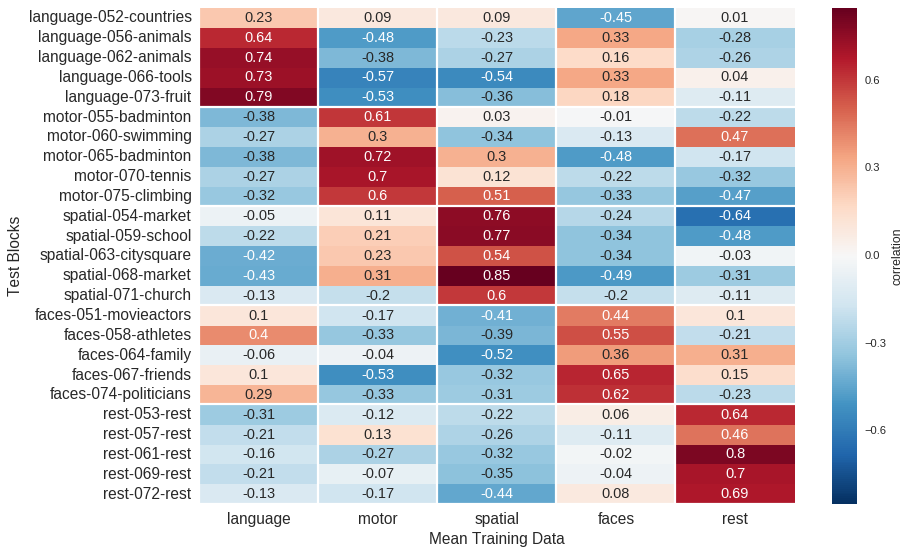

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(myCorrDf.round(2),annot=True,
            cbar_kws={"label":"correlation"},
            annot_kws={"fontsize": 13} )
for i in range(0,25,5):
    plt.axhline(i,color='white',linewidth=2)
for i in range(0,5,1):
    plt.axvline(i,color='white',linewidth=2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Mean Training Data',fontsize=14)
plt.ylabel('Test Blocks',fontsize=14)

plt.savefig('../figs/fig7_testMeanHeat.png',dpi=300,bbox_inches='tight')
plt.show()

### Decision rule

In [42]:
def makeCorrPred(myCorrDf):
    
    # empty dictionary to write to
    d = {}

    # for each row (block)
    for cond,num in myCorrDf.index:

        thisDf = myCorrDf.loc[cond].loc[num]
        # get the highest value
        winner = thisDf.idxmax()
        # store the real condition, the winning condition and the evaluation whether both match
        d[num] = {'real':cond, 'winner':winner,'hit':cond==winner  }
        
    # convert dictionary to dataframe
    predDf = pd.DataFrame(d).T

    # compute the % correct
    percentCorrect = np.mean( [int(x) for x in predDf['hit']] )*100
    
    return predDf,percentCorrect

In [43]:
corrPredDf,corrPcCorrect = makeCorrPred(myCorrDf)

In [44]:
corrPredDf

,hit,real,winner
051-movieactors,True,faces,faces
052-countries,True,language,language
053-rest,True,rest,rest
054-market,True,spatial,spatial
055-badminton,True,motor,motor
056-animals,True,language,language
057-rest,True,rest,rest
058-athletes,True,faces,faces
059-school,True,spatial,spatial
060-swimming,False,motor,rest


In [45]:
def makeConfusion(corrDf):
    
    d = {}
    # for all rows (blocks)
    for i in corrDf.index:
        # the first entry in the index is the actual condition
        correct = i[0]
        # the prediciton is the one with the highest value
        predicted = corrDf.loc[i].idxmax()
        # we add to the dictionary, if that condition already exists
        try:
            d[correct].append(predicted)
        # otherwise, we add the condition to the dict
        except:
            d[correct] = [predicted]
    df = pd.DataFrame(d)

    # make a new dict
    d = {}
    # for each column in the new dataframe, where each column is the condition
    # and each row is a prediction
    for true in df.columns:
        # for this condition, start a new entry
        d[true] = {}
        # for each condition
        for pred in df.columns:
            # get the average number of times where a certain condition was predicted,
            # given what the correct answer would have been
            d[true][pred] = (df[true]==pred).mean()

    # make into dataframe and format 
    confDf = pd.DataFrame(d).T
    confDf.index= [['True']*len(confDf.index),confDf.index]
    confDf.columns= [['Predicted']*len(confDf.columns),confDf.columns]
    
    return confDf*100 # convert to percent

In [46]:
confDf = makeConfusion(myCorrDf)

In [47]:
confDf

Predicted                              
                  faces language motor   rest spatial
True faces        100.0      0.0   0.0    0.0     0.0
     language       0.0    100.0   0.0    0.0     0.0
     motor          0.0      0.0  80.0   20.0     0.0
     rest           0.0      0.0   0.0  100.0     0.0
     spatial        0.0      0.0   0.0    0.0   100.0

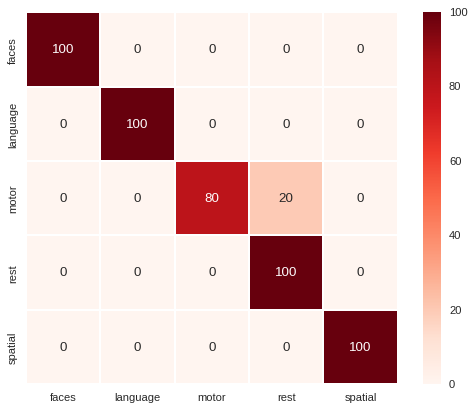

In [48]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

sns.heatmap(confDf.loc['True']['Predicted'].astype(int),
            square=True,cmap=('Reds'),vmin=0,vmax=100,fmt='.3g',
            linewidths=1,annot=True,ax=ax )
plt.show()

In [49]:
print "%i%% correct predictions!" % corrPcCorrect

96% correct predictions!


### binomial test of chance

In [50]:
from scipy import stats

In [51]:
thisN = corrPredDf.shape[0]
numHits = (corrPcCorrect/100.)*thisN
print numHits,thisN
print 'p=%.20f' % stats.binom_test( numHits,n=thisN,p=1./5)
print stats.binom_test( numHits,n=thisN,p=1./5)

24.0 25
p=0.00000000000000033890
3.388997632000004e-16
